In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

from sklearn.model_selection import  train_test_split
from sklearn.linear_model import Ridge 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
train_df = pd.read_csv("datasets/Train.csv")
test_df = pd.read_csv("datasets/Test.csv")
submit_df = pd.read_csv("datasets/SampleSubmission.csv")

train_df["train"] = 1
test_df["train"] = 0

In [3]:
# (train_df.isnull().sum() / len(train_df) * 100).sort_values(ascending=False)

In [4]:
def wrangle(frames): 
    df = pd.concat(frames, axis=0, ignore_index=True)

    # remove columns with more than 40 % of null values 
    bad_cols = []
    for i in df.columns: 
        if (df[i].isnull().sum() / len(df) * 100) > 40: 
            bad_cols.append(i)
    df = df.drop(columns=bad_cols)
    df = df.set_index("id")
    
    
    return df

In [5]:
df = wrangle([train_df, test_df])

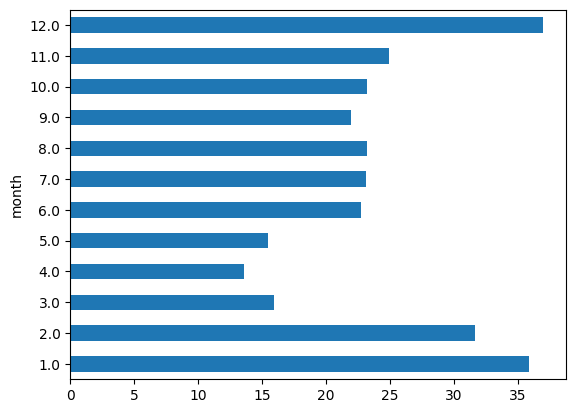

In [6]:
df.groupby("month")["pm2_5"].mean().plot(kind="barh");

The barchat above reveals that the month column will be very usefull in the prediction 

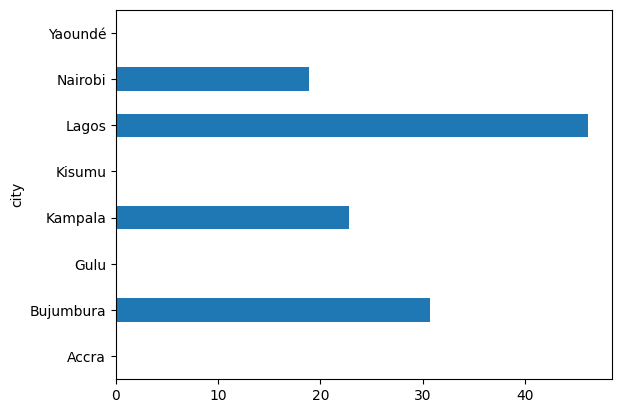

In [7]:
df.groupby("city")["pm2_5"].mean().plot(kind="barh");

The city column will be an excellent predictor for pm2_5 

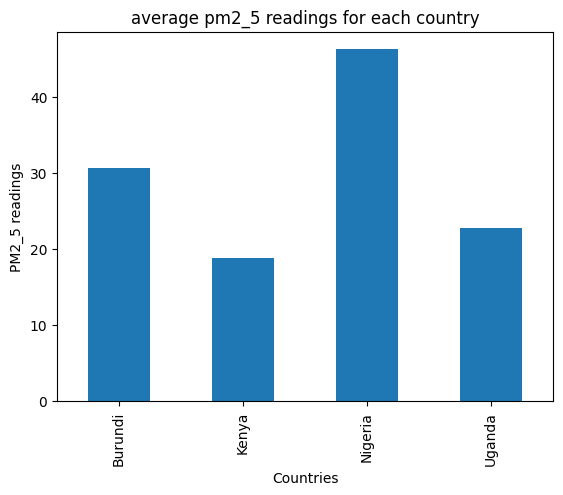

In [8]:
train_df.groupby("country")["pm2_5"].mean().plot(kind="bar")
plt.title("average pm2_5 readings for each country")
plt.ylabel("PM2_5 readings")
plt.xlabel("Countries");

In [9]:
df

,site_id,site_latitude,site_longitude,city,country,date,hour,month,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,...,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,pm2_5,train
id,,,,,,,,,,,,,,,,,,,,,
id_vjcx08sz91,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-10-25,13,10.0,0.052301,828817.937500,...,2.301404,0.285803,230.693756,0.906039,-100.805145,21.720518,-123.523796,33.745914,12.015000,1
id_bkg215syli,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-02,12,11.0,-0.315206,828578.625000,...,3.049902,0.362203,228.260193,0.364713,70.875954,59.220097,-143.480164,26.525513,42.267200,1
id_oui2pot3qd,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-03,13,11.0,1.097816,828878.687500,...,3.248703,0.384168,224.102463,0.754163,-96.411942,61.045010,-121.307121,41.898113,39.450741,1
id_9aandqzy4n,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-08,14,11.0,0.591543,828920.687500,...,3.505708,0.416643,226.529633,1.000000,-95.863083,65.508858,-122.218231,43.923038,10.537600,1
id_ali5x2m4iw,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-09,13,11.0,0.069669,828919.000000,...,2.796072,0.334256,226.368851,0.226150,-97.811241,49.513344,-126.064468,40.167336,19.431731,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id_5yblexf7zp,64654b4dd5320e001d6c499a,-0.10098,34.76242,Kisumu,Kenya,2024-01-27,10,1.0,-0.843536,829377.286607,...,2.816367,0.310242,225.885395,0.551999,72.410332,55.522726,-150.770801,21.260554,NaN,0
id_c9cycuvetl,65c8c557b3d86f0012b2e32b,3.89696,11.50603,Yaoundé,Cameroon,2024-02-21,12,2.0,0.949134,828875.250000,...,2.168574,0.244619,231.852348,0.843743,-101.385143,16.572032,-125.512385,25.085916,NaN,0
id_8xu1ardxni,65c8c557b3d86f0012b2e32b,3.89696,11.50603,Yaoundé,Cameroon,2024-02-22,12,2.0,-0.537142,828964.812500,...,2.155675,0.246398,227.446350,0.868273,75.419777,22.231136,-131.923615,21.258587,NaN,0


In [10]:
# separate the training set and the test set 
train = df[df["train"] == 1]
test = df[df["train"] == 0] 

test = test.drop(columns=["train"])
train = train.drop(columns=["train"])



In [11]:
test.shape

(2783, 24)

In [12]:
features = train.columns.tolist()[1:-1]
target = "pm2_5"
features

['site_latitude',
 'site_longitude',
 'city',
 'country',
 'date',
 'hour',
 'month',
 'uvaerosolindex_absorbing_aerosol_index',
 'uvaerosolindex_sensor_altitude',
 'uvaerosolindex_sensor_azimuth_angle',
 'uvaerosolindex_sensor_zenith_angle',
 'uvaerosolindex_solar_azimuth_angle',
 'uvaerosolindex_solar_zenith_angle',
 'ozone_o3_column_number_density',
 'ozone_o3_column_number_density_amf',
 'ozone_o3_slant_column_number_density',
 'ozone_o3_effective_temperature',
 'ozone_cloud_fraction',
 'ozone_sensor_azimuth_angle',
 'ozone_sensor_zenith_angle',
 'ozone_solar_azimuth_angle',
 'ozone_solar_zenith_angle']

In [28]:
X_train = train[features]
y_train = train[target]

X_test = test[features]


In [51]:
convertible_cols = []

for feature in features: 
    try: 
        X_train[feature] = X_train[feature].astype(float)
        convertible_cols.append(feature)
    except ValueError: 
        pass

C:\Users\Balogun Oladimeji\AppData\Local\Temp\ipykernel_16708\3635770149.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feature] = X_train[feature].astype(float)
C:\Users\Balogun Oladimeji\AppData\Local\Temp\ipykernel_16708\3635770149.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feature] = X_train[feature].astype(float)
C:\Users\Balogun Oladimeji\AppData\Local\Temp\ipykernel_16708\3635770149.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [52]:
for feature in features: 
    try: 
        X_test[feature] = X_test[feature].astype(float)
        
    except ValueError: 
        pass

C:\Users\Balogun Oladimeji\AppData\Local\Temp\ipykernel_16708\4022007384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feature] = X_test[feature].astype(float)
C:\Users\Balogun Oladimeji\AppData\Local\Temp\ipykernel_16708\4022007384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feature] = X_test[feature].astype(float)
C:\Users\Balogun Oladimeji\AppData\Local\Temp\ipykernel_16708\4022007384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [53]:
len(convertible_cols)

19

In [62]:
cat_cols = ["city", "country", "date"]

In [63]:
enc = OneHotEncoder()
encoded_values = enc.fit_transform(df[cat_cols])

In [65]:
enc_cols = enc.get_feature_names_out

In [75]:
"city" in features

True

In [54]:
# creates the dumb model 
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)

mean_absolute_error(y_pred_baseline, y_train)

13.152342135867885

In [55]:
model = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(strategy="most_frequent"), 
    MaxAbsScaler(), 
    LinearRegression()
)

In [56]:
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('maxabsscaler', MaxAbsScaler()),
                ('linearregression', LinearRegression())])

In [57]:
preds = model.predict(X_train)

In [47]:
mean_absolute_error(y_train, preds)

0.9301513659168268

In [59]:
test_pred = model.predict(X_test)

ValueError: Found unknown categories [-0.1407297, -0.11817, -0.11705616737279, -0.105224, -0.1022669, -0.101823, -0.1009801, -0.0884498, -0.086462, -0.0828004, -0.0786859, -0.07433042319469, -0.0707868, -0.0560739, -0.0401976, 2.745582, 2.7713174, 2.7722159, 2.7793857, 2.784562, 2.7896747, 2.7923171, 3.8266, 3.83572, 3.84492, 3.85638, 3.87309, 3.87356, 3.87414, 3.88712, 3.89696, 5.54551, 5.54916, 5.55037, 5.580642, 5.58593, 5.59345, 5.61252, 5.65147] in column 0 during transform

In [60]:
X_test

,site_latitude,site_longitude,city,country,date,hour,month,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,...,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle
id,,,,,,,,,,,,,,,,,,,,,
id_ihxgrbq8bw,5.61252,-0.22955,Accra,Ghana,2023-09-06,13.0,9.0,-0.258422,829420.312500,-100.330299,...,25.512329,0.126056,2.243713,0.286278,230.244171,0.079324,-100.330299,26.926420,-86.879776,25.512329
id_dg6s4fhiwe,5.61252,-0.22955,Accra,Ghana,2023-09-07,13.0,9.0,-0.408162,829340.750000,76.400116,...,20.951560,0.126282,2.136400,0.273757,230.184377,0.613266,76.400116,11.171532,-87.726566,20.951560
id_f7hwwtmuzp,5.61252,-0.22955,Accra,Ghana,2023-09-08,13.0,9.0,-0.115169,829204.480816,73.117264,...,16.417355,0.126162,2.428528,0.311882,237.772241,0.164370,73.117264,43.112466,-89.089083,16.417355
id_ioese5awdg,5.61252,-0.22955,Accra,Ghana,2023-09-09,12.0,9.0,-1.116044,829067.312500,70.680077,...,11.865146,0.121339,3.074277,0.378890,225.704056,0.845910,70.680077,61.874397,-90.875526,11.865146
id_hdw320zpls,5.61252,-0.22955,Accra,Ghana,2023-09-20,12.0,9.0,-0.211314,828876.562500,70.066956,...,12.226210,0.127799,3.335475,0.432085,237.175858,0.000000,70.066956,66.014107,-111.396515,12.226210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id_5yblexf7zp,-0.10098,34.76242,Kisumu,Kenya,2024-01-27,10.0,1.0,-0.843536,829377.286607,72.408461,...,21.255240,0.108112,2.816367,0.310242,225.885395,0.551999,72.410332,55.522726,-150.770801,21.260554
id_c9cycuvetl,3.89696,11.50603,Yaoundé,Cameroon,2024-02-21,12.0,2.0,0.949134,828875.250000,-101.385143,...,25.085916,0.110979,2.168574,0.244619,231.852348,0.843743,-101.385143,16.572032,-125.512385,25.085916
id_8xu1ardxni,3.89696,11.50603,Yaoundé,Cameroon,2024-02-22,12.0,2.0,-0.537142,828964.812500,75.419777,...,21.258587,0.112540,2.155675,0.246398,227.446350,0.868273,75.419777,22.231136,-131.923615,21.258587


In [58]:
X_test.columns == X_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

,city,country,date
id,,,
id_vjcx08sz91,Lagos,Nigeria,2023-10-25
id_bkg215syli,Lagos,Nigeria,2023-11-02
id_oui2pot3qd,Lagos,Nigeria,2023-11-03
id_9aandqzy4n,Lagos,Nigeria,2023-11-08
id_ali5x2m4iw,Lagos,Nigeria,2023-11-09
...,...,...,...
id_ov6ddbfdf0,Nairobi,Kenya,2024-01-17
id_3tv6i1a09t,Nairobi,Kenya,2024-01-24
id_csqjqt3f9i,Nairobi,Kenya,2024-01-25
